# Retail Sales Prediction


## Problem Statement

This project is to predict the sales across different stores. The data containing historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales



## Objective

The objective of this project is to

    1. Predict the department-wide sales for each store for the following year

    2. Model the effects of markdowns on holiday weeks

    3. Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact



### Data description

There are 3 datasets used in this project. Their respecitve details as follows:

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sales

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

Store – Store ID

Dept – Department ID

Date – Week start date

Weekly_Sales -sales for the given department in the given store

IsHoliday - whether the week is a special holiday week


In [2]:
sales = pd.read_csv('sales_data_set.csv')
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape)

Sales Total Col. 5 
Shape: (421570, 5)


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000



### Stores

Anonymized information about the 45 stores, indicating the type and size of store

Store - Store ID

Type - Type of Store (A,B,C)

Size – Size of the store

In [6]:
stores = pd.read_csv('stores_data_set.csv')
print('stores_total_column :', len(stores.columns),"\nsahpe :",stores.shape)

stores_total_column : 3 
sahpe : (45, 3)


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Features

Contains additional data related to the store, department, and regional activity for the given dates.

Store – Store ID

Date – Week start date

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with NA

CPI - the consumer price index

Unemployment - the unemployment rate

IsHoliday - whether the week is a special holiday week

In [10]:
features = pd.read_csv('Features_data_set.csv')
print('Feature total column :',len(features.columns),"\nShape :",features.shape)

Feature total column : 12 
Shape : (8190, 12)


In [11]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


## Analysing and Merging Data

In [15]:
sales.loc[sales['Store'] == 1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
10239,1,99,31/08/2012,20.06,False
10240,1,99,07/09/2012,0.05,True
10241,1,99,14/09/2012,0.03,False
10242,1,99,05/10/2012,635.00,False


In [17]:
features.loc[features['Store']==1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,28/06/2013,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
178,1,05/07/2013,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
179,1,12/07/2013,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False
180,1,19/07/2013,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,NaN,NaN,False


In [18]:
sales.loc[(sales['Store']==1) & (sales['Date']=='05/02/2010') & (sales['IsHoliday']==False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
143,1,2,05/02/2010,50605.27,False
286,1,3,05/02/2010,13740.12,False
429,1,4,05/02/2010,39954.04,False
572,1,5,05/02/2010,32229.38,False
...,...,...,...,...,...
9370,1,93,05/02/2010,64494.87,False
9513,1,94,05/02/2010,56655.39,False
9656,1,95,05/02/2010,106690.06,False
9921,1,97,05/02/2010,32153.04,False


In [19]:
features.loc[(features['Store']==1) & (features['Date']== '05/02/2010') & (features['IsHoliday']==False)]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [22]:
data =sales.merge(features,on=['Store','Date','IsHoliday'],how="left")

In [23]:
data.loc[(data['Store']==1) & (data['Date']=='05/02/2010') & (data['IsHoliday']==False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
143,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
286,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
429,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
572,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,1,93,05/02/2010,64494.87,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9513,1,94,05/02/2010,56655.39,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9656,1,95,05/02/2010,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9921,1,97,05/02/2010,32153.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [24]:
stores.loc[stores['Store'] == 1]

,Store,Type,Size
0,1,A,151315


In [26]:
data = data.merge(stores, how='left',on ='Store')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [27]:
data.loc[(data['Store']==1) & (data['Date']=='05/02/2010') & (data['IsHoliday']==False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
143,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
286,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
429,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
572,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,1,93,05/02/2010,64494.87,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9513,1,94,05/02/2010,56655.39,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9656,1,95,05/02/2010,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9921,1,97,05/02/2010,32153.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [29]:
intialData =data
print('Total_col_final_data :',len(data.columns),"\nShape :",data.shape,"\nColumns :",data.columns.tolist())

Total_col_final_data : 16 
Shape : (421570, 16) 
Columns : ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


### Save the merged dataframe to a csv file and pickle for future reference.

File can be saved as csv using pandas to_csv method.


In [32]:
 data.to_csv('Retail_Sales_Merged.csv')


### Pickle

Pickle is python's way to store the dataframes as python objects. Saving any dataframe to pickle helps in resuing the pickle object directly to read the dataframe to session

This file is stored on the disk and can be exported to any file storage sevice thus giving the flexibility resuing the object to read directly from storage locations when there is change in working environments.

Also, pickling helps to avoid all the data reading steps from csv and all steps involved in merging dataframes


In [33]:
pd.to_pickle(intialData, 'Retail_Sales_Merged.pkl')

In [ ]:
# pickling helps to avoid all the data reading steps from csv and all steps involved in merging dataframes
# raw_data_pkl = pd.read_pickle('Retail_Sales_Merged.pkl')
# raw_data_pkl

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


# Explore Data

## Numerical Data

### Find the numerical Var

In [38]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)

There are 14 numerical variables : 
 ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


In [40]:
data[numerical].head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315


#### check and replacing missing values in numerical variables

In [42]:
data[numerical].isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
dtype: int64

In [44]:
# Replace NaN with default values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value = 0) 
imputer.fit(data[numerical]) 
data[numerical]=imputer.transform(data[numerical])
data[numerical].isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [45]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1.0,1.0,05/02/2010,24924.50,0.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315.0
1,1.0,1.0,12/02/2010,46039.49,1.0,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315.0
2,1.0,1.0,19/02/2010,41595.55,0.0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315.0
3,1.0,1.0,26/02/2010,19403.54,0.0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315.0
4,1.0,1.0,05/03/2010,21827.90,0.0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315.0


#### data.IsHoliday
True = 1
False = 0

In [46]:
# Verify the numerical variables

numerical= [var for var in data.columns if data[var].dtypes != 'O']
print('There are {} numerical variables :\n'.format(len(numerical)),numerical)

There are 14 numerical variables :
 ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


Text(0.5, 0, 'Date')

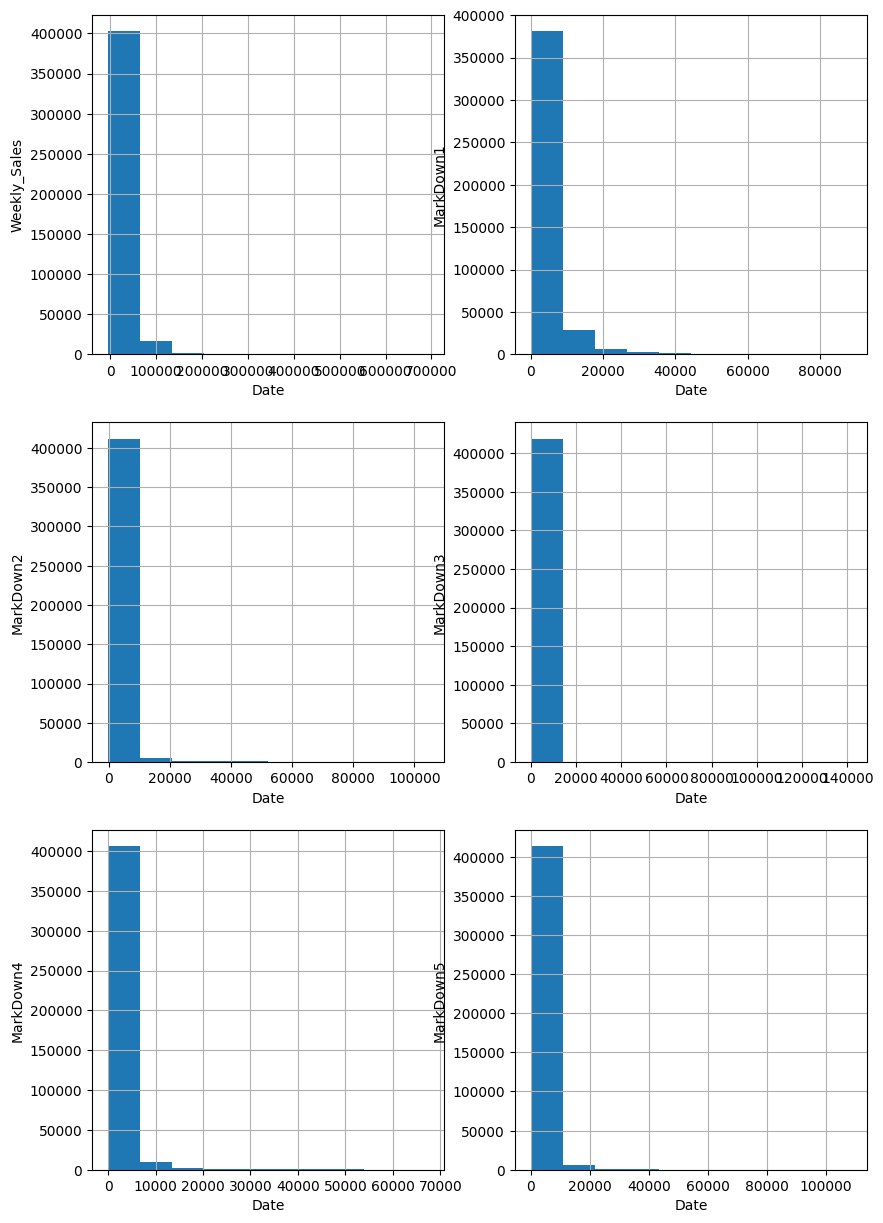

In [47]:
# Check for outliers
# plot histogram to check distribution
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
fig = data.Weekly_Sales.hist(bins=10)
fig.set_ylabel('Weekly_Sales')
fig.set_xlabel('Date')

plt.subplot(3, 2, 2)
fig = data.MarkDown1.hist(bins=10)
fig.set_ylabel('MarkDown1')
fig.set_xlabel('Date')

plt.subplot(3, 2, 3)
fig = data.MarkDown2.hist(bins=10)
fig.set_ylabel('MarkDown2')
fig.set_xlabel('Date')

plt.subplot(3, 2, 4)
fig = data.MarkDown3.hist(bins=10)
fig.set_ylabel('MarkDown3')
fig.set_xlabel('Date')

plt.subplot(3, 2, 5)
fig = data.MarkDown4.hist(bins=10)
fig.set_ylabel('MarkDown4')
fig.set_xlabel('Date')

plt.subplot(3, 2, 6)
fig = data.MarkDown5.hist(bins=10)
fig.set_ylabel('MarkDown5')
fig.set_xlabel('Date')

### Check the duplicates

In [52]:
print("Duplicated Values :", data.duplicated().sum())

Duplicated Values : 0


## Categorical Data

### find categorical variables

In [58]:
categorical = [ var for var in data.columns if data[var].dtypes == 'O']
print('There are {} categorical columns: \n'.format(len(categorical)),categorical)

There are 2 categorical columns: 
 ['Date', 'Type']


In [59]:
data[categorical].head()

,Date,Type
0,05/02/2010,A
1,12/02/2010,A
2,19/02/2010,A
3,26/02/2010,A
4,05/03/2010,A


In [62]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### check and print categorical variables containing missing values

In [63]:
nullCategorical = [var for var in categorical if data[var].isnull().sum()!=0]
print(data[nullCategorical].isnull().sum())

Series([], dtype: float64)


### check for cardinality in categorical variables

In [64]:
for var in categorical:
    print(var,'contains', len(data[var].unique()),'labels')

Date contains 143 labels
Type contains 3 labels


# Data Analysis

### Seasonality vs Trend Analysis

In [79]:
# average sales for all store/department per week
average_sales_per_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_week.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [80]:
# sort by date 
average_sales_per_week= average_sales_per_week.sort_values('Date', ascending=True)
average_sales_per_week.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [73]:
average_sales_per_week=average_sales_per_week.sort_values('Weekly_Sales', ascending=False)
average_sales_per_week.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
94,2011-11-25,66593605.26
42,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [76]:
# average sales for all store/department per week split on holiday

average_sales_per_week_n =data.groupby(by=['Date','IsHoliday'],as_index=False)['Weekly_Sales'].sum()
average_sales_per_week_n.head()

,Date,IsHoliday,Weekly_Sales
0,2010-02-05,0.0,49750740.50
1,2010-02-12,1.0,48336677.63
2,2010-02-19,0.0,48276993.78
3,2010-02-26,0.0,43968571.13
4,2010-03-05,0.0,46871470.30


In [78]:
# sort by date 
average_sales_per_week_n = average_sales_per_week_n.sort_values("Date",ascending=True)
average_sales_per_week_n.head()

,Date,IsHoliday,Weekly_Sales
0,2010-02-05,0.0,49750740.50
1,2010-02-12,1.0,48336677.63
2,2010-02-19,0.0,48276993.78
3,2010-02-26,0.0,43968571.13
4,2010-03-05,0.0,46871470.30


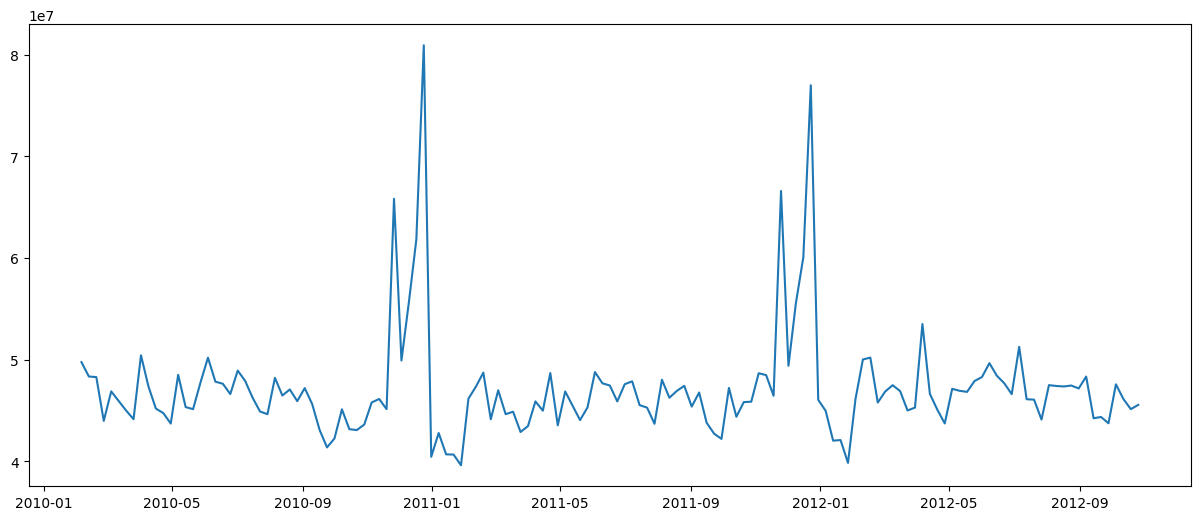

In [84]:
# plot average sales for all store/department per week
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week.Date, average_sales_per_week.Weekly_Sales)
plt.show()

c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

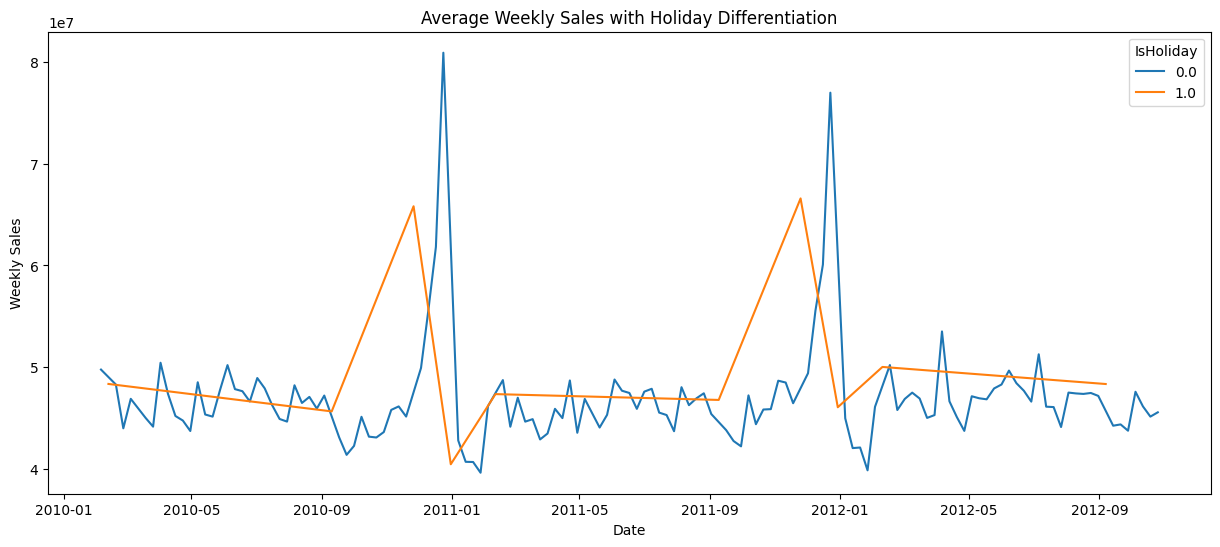

In [91]:
# plot average sales for all store/department per week split by holiday

# Assuming average_sales_per_week_n  with differentiating lines for holidays = True as 1 and non-holidays = False as 0 (IsHoliday column). 

plt.figure(figsize=(15, 6))
sns.lineplot(data=average_sales_per_week_n, x="Date", y="Weekly_Sales", hue="IsHoliday")

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Average Weekly Sales with Holiday Differentiation")

# Display the plot
plt.show()

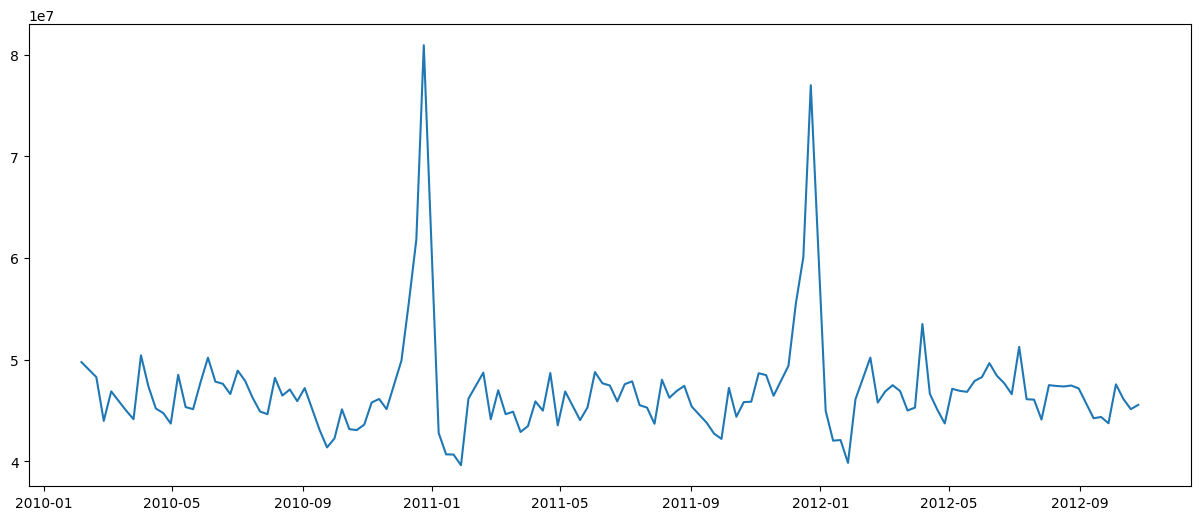

In [92]:
# plot average sales for all store/department per week when IsHoliday = False
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==False)]['Date'], average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==False)]['Weekly_Sales'])
plt.show()


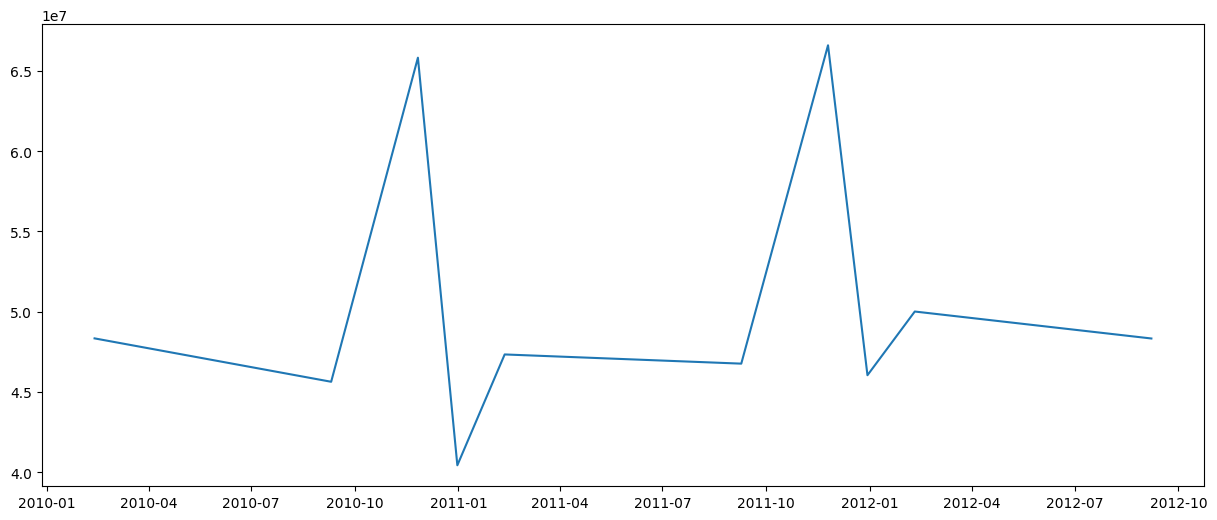

In [96]:
# plot average sales for all store/department per week when IsHoliday = True
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==True)]['Date'], average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==True)]['Weekly_Sales'])
plt.show()

Inference :
+ Nov- Dec shows spike in Weekly Sales.The sales total has not increased over year.
+ Weeks near holiday shows peak in sales.

### Year/Month wise sales Analysis

In [98]:
# create a dataframe with only date and weekly sales details
average_sales_per_date = data.loc[:, ('Date','Weekly_Sales')]
average_sales_per_date['Month'] =pd.DatetimeIndex(average_sales_per_date['Date']).month
average_sales_per_date['Year'] =pd.DatetimeIndex(average_sales_per_date['Date']).year
average_sales_per_date

,Date,Weekly_Sales,Month,Year
0,2010-02-05,24924.50,2,2010
1,2010-02-12,46039.49,2,2010
2,2010-02-19,41595.55,2,2010
3,2010-02-26,19403.54,2,2010
4,2010-03-05,21827.90,3,2010
...,...,...,...,...
421565,2012-09-28,508.37,9,2012
421566,2012-10-05,628.10,10,2012
421567,2012-10-12,1061.02,10,2012
421568,2012-10-19,760.01,10,2012


In [100]:
# get sales per month 
average_sales_per_month = average_sales_per_date.groupby(by=['Month'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_month

,Month,Weekly_Sales
0,1,3.325984e+08
1,2,5.687279e+08
2,3,5.927859e+08
3,4,6.468598e+08
4,5,5.571256e+08
5,6,6.226299e+08
6,7,6.500010e+08
7,8,6.130902e+08
8,9,5.787612e+08
9,10,5.847848e+08


In [102]:
# sort by month 
average_sales_per_month= average_sales_per_month.sort_values('Month', ascending=True)
average_sales_per_month

,Month,Weekly_Sales
0,1,3.325984e+08
1,2,5.687279e+08
2,3,5.927859e+08
3,4,6.468598e+08
4,5,5.571256e+08
5,6,6.226299e+08
6,7,6.500010e+08
7,8,6.130902e+08
8,9,5.787612e+08
9,10,5.847848e+08


c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


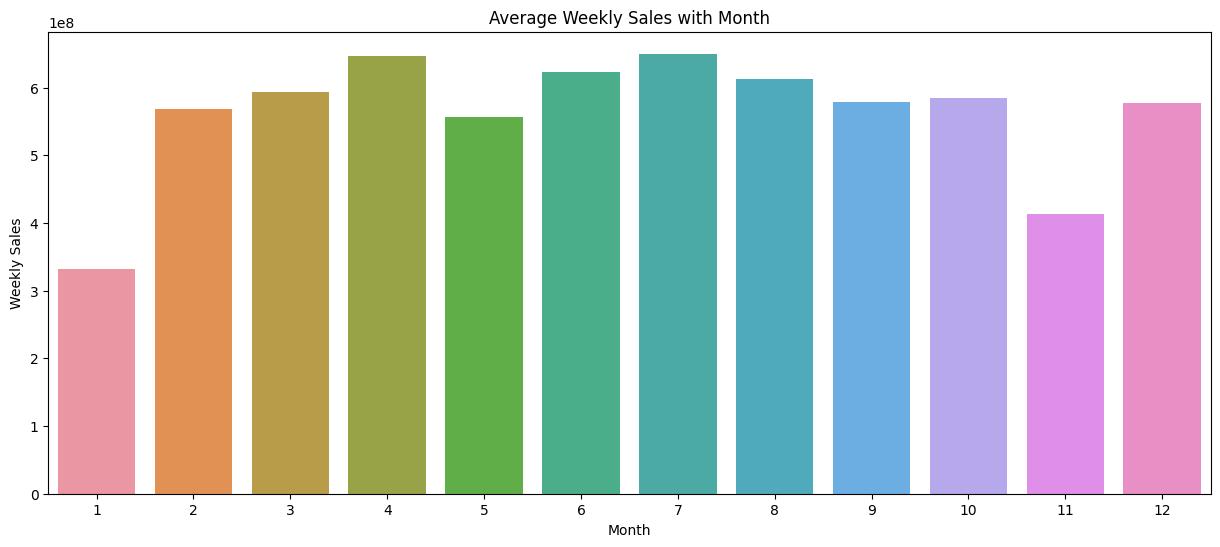

In [104]:
# plot average sales for all store/department per week

plt.figure(figsize=(15,6))
sns.barplot(x=average_sales_per_month.Month, y=average_sales_per_month.Weekly_Sales)

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.title("Average Weekly Sales with Month")

# Display the plot
plt.show()

In [105]:
# get sales per year 
average_sales_per_year = average_sales_per_date.groupby(by='Year', as_index=False)['Weekly_Sales'].sum()
average_sales_per_year

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


In [106]:
# sort by year 
average_sales_per_year= average_sales_per_year.sort_values('Year', ascending=True)
average_sales_per_year.head()

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


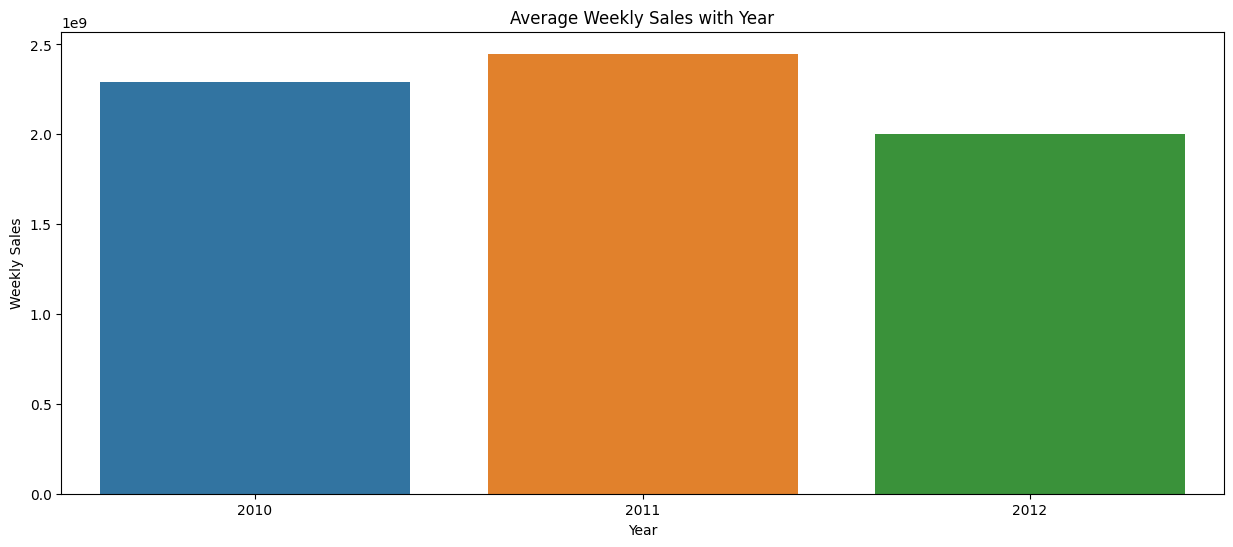

In [107]:
# plot total sales for all store/department per week

plt.figure(figsize=(15,6))
sns.barplot(x=average_sales_per_year.Year, y=average_sales_per_year.Weekly_Sales)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title("Average Weekly Sales with Year")

# Display the plot
plt.show()

In [108]:
print('The data is from {} till {}'.format(data['Date'].min(), data['Date'].max()))

The data is from 2010-02-05 00:00:00 till 2012-10-26 00:00:00



Inference : 
+ Low sales shown in above bar graphs for the month of December and for the year 2012 could be due to the incomplete December month sales data for the year 2012.
+ There is hike in sales during holidays (Black friday Sales,Chrismas,New year). 
+ People tend to buy less during the months of January and November. 

### Store wise Analysis

In [110]:
# Sales for all store/department based on store type
sales_per_store_type = data.groupby(by='Type', as_index=False)['Weekly_Sales'].sum()
sales_per_store_type

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [111]:
# average sales for all store/department per week split on store type

sales_per_store_type_n = data.groupby(by=['Date','Type'], as_index=False)['Weekly_Sales'].sum()
sales_per_store_type_n.head()

,Date,Type,Weekly_Sales
0,2010-02-05,A,32144126.25
1,2010-02-05,B,14775498.62
2,2010-02-05,C,2831115.63
3,2010-02-12,A,30982570.79
4,2010-02-12,B,14439178.59


In [112]:
# sort by date 
sales_per_store_type_n= sales_per_store_type_n.sort_values('Date', ascending=True)
sales_per_store_type_n

,Date,Type,Weekly_Sales
0,2010-02-05,A,32144126.25
1,2010-02-05,B,14775498.62
2,2010-02-05,C,2831115.63
3,2010-02-12,A,30982570.79
4,2010-02-12,B,14439178.59
...,...,...,...
423,2012-10-19,A,28851600.49
425,2012-10-19,C,2907405.83
427,2012-10-26,B,13560940.97
426,2012-10-26,A,29128295.31


c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

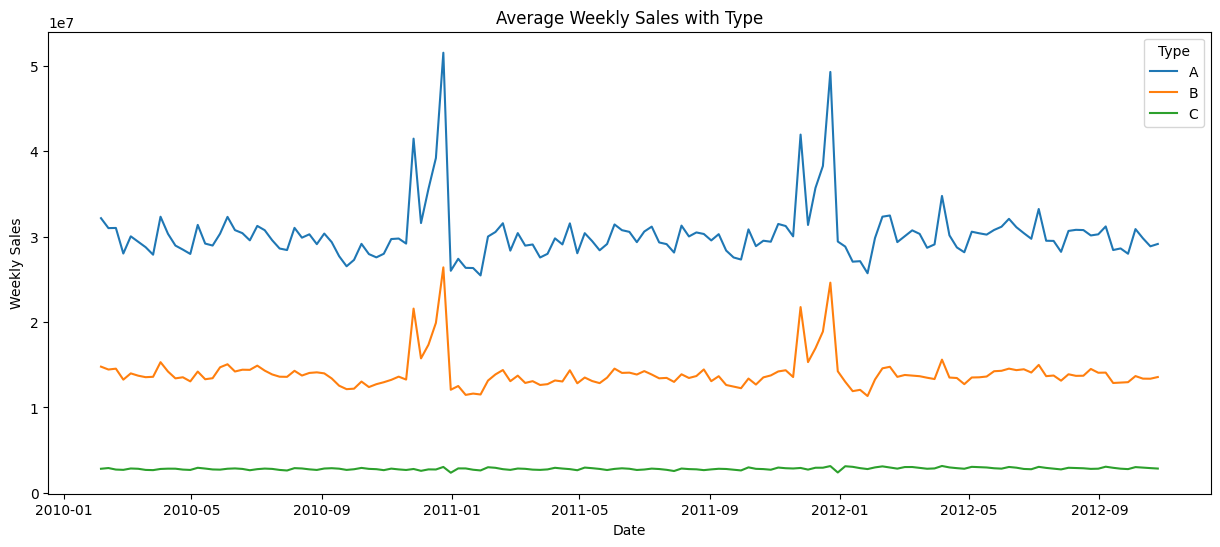

In [113]:
# plot average sales for all store/department per week split on store type
plt.figure(figsize=(15,6))
sns.lineplot(data=sales_per_store_type_n, x="Date", y="Weekly_Sales", hue="Type")

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Average Weekly Sales with Type")

# Display the plot
plt.show()

c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Type', ylabel='count'>

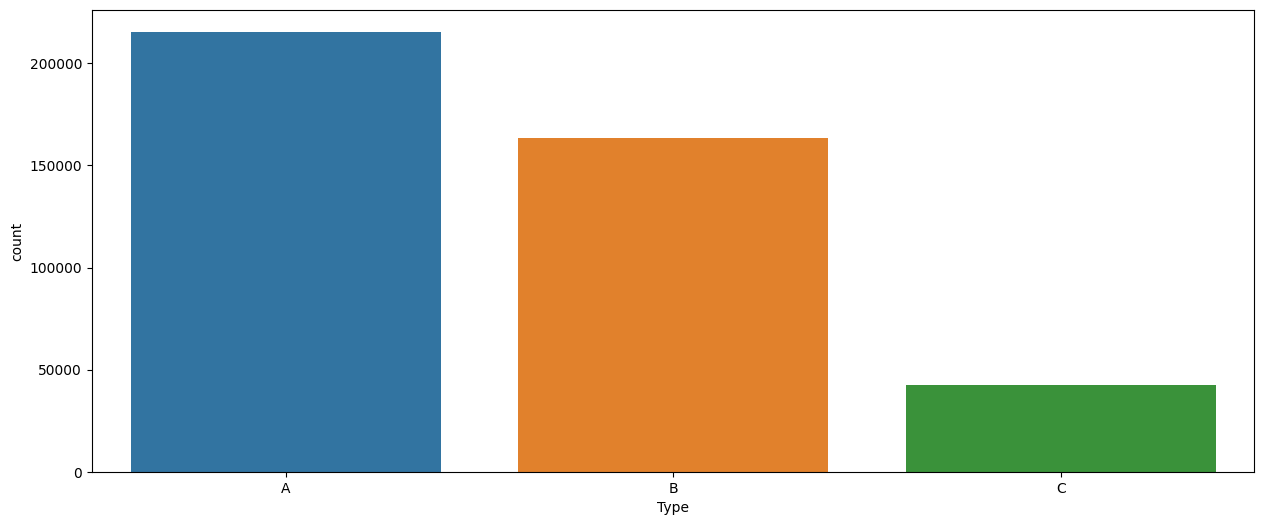

In [116]:
plt.figure(figsize=(15,6))
# plot the count of stores per type
sns.countplot(data=data, x='Type')


c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

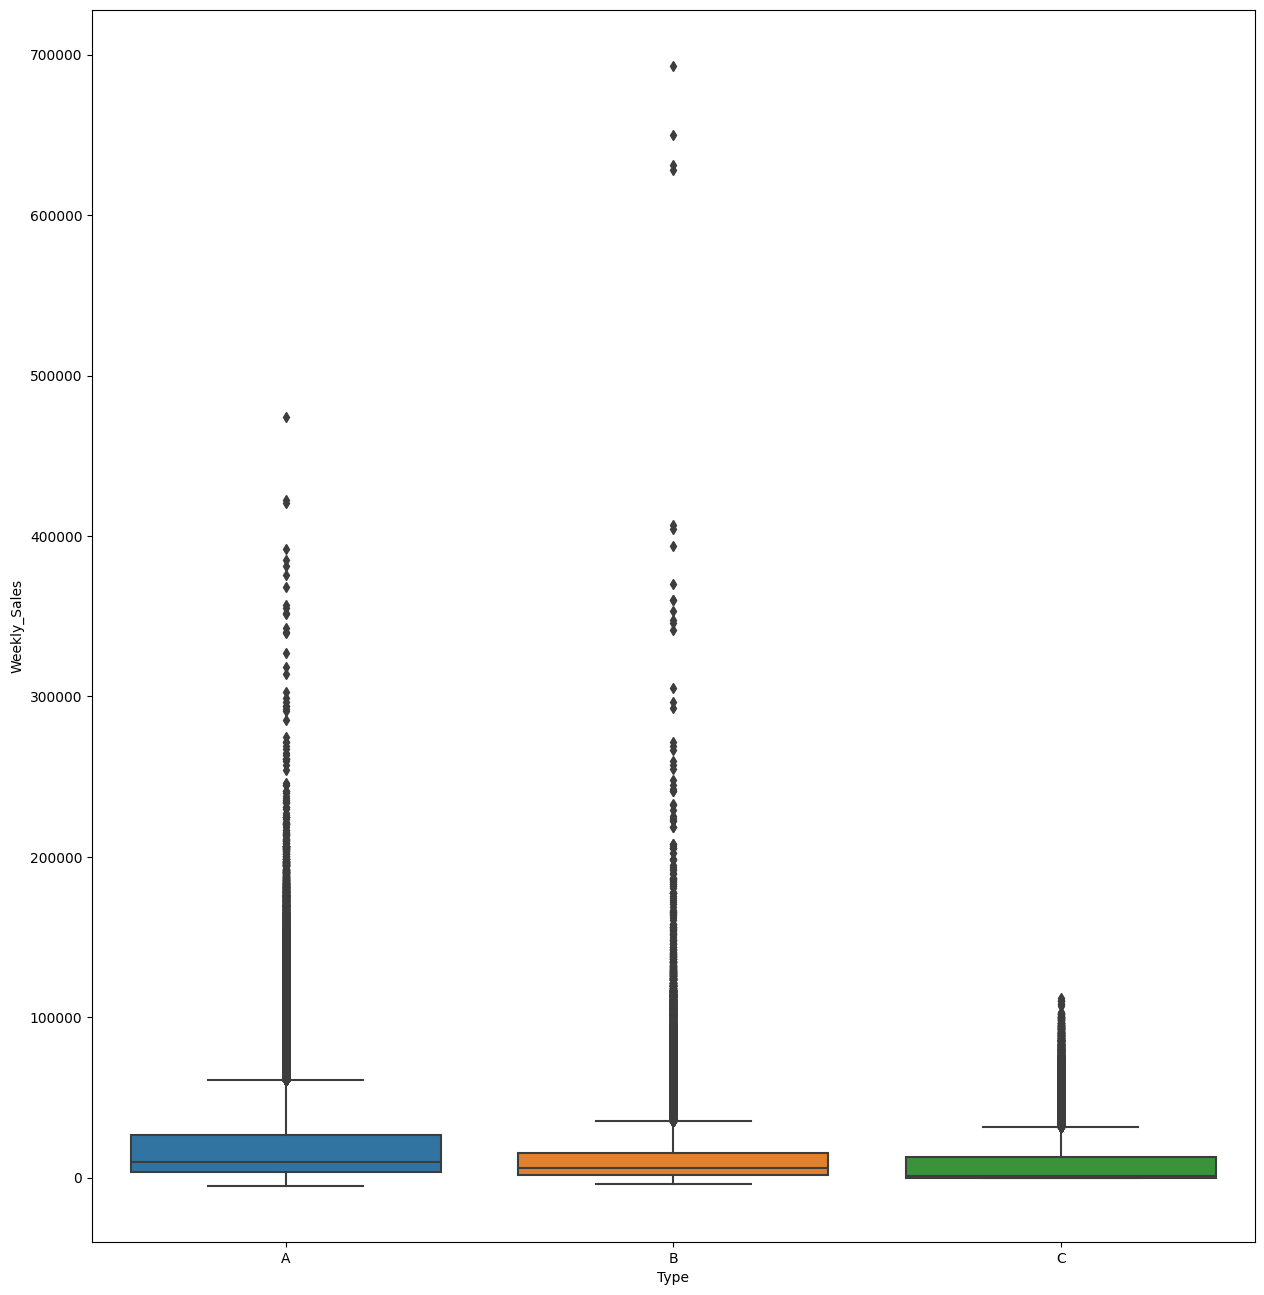

In [117]:
plt.figure(figsize=(15,16))
# plot the weekly sales of stores per type
sns.boxplot(data = data,x="Type",y="Weekly_Sales")

c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Type', ylabel='Size'>

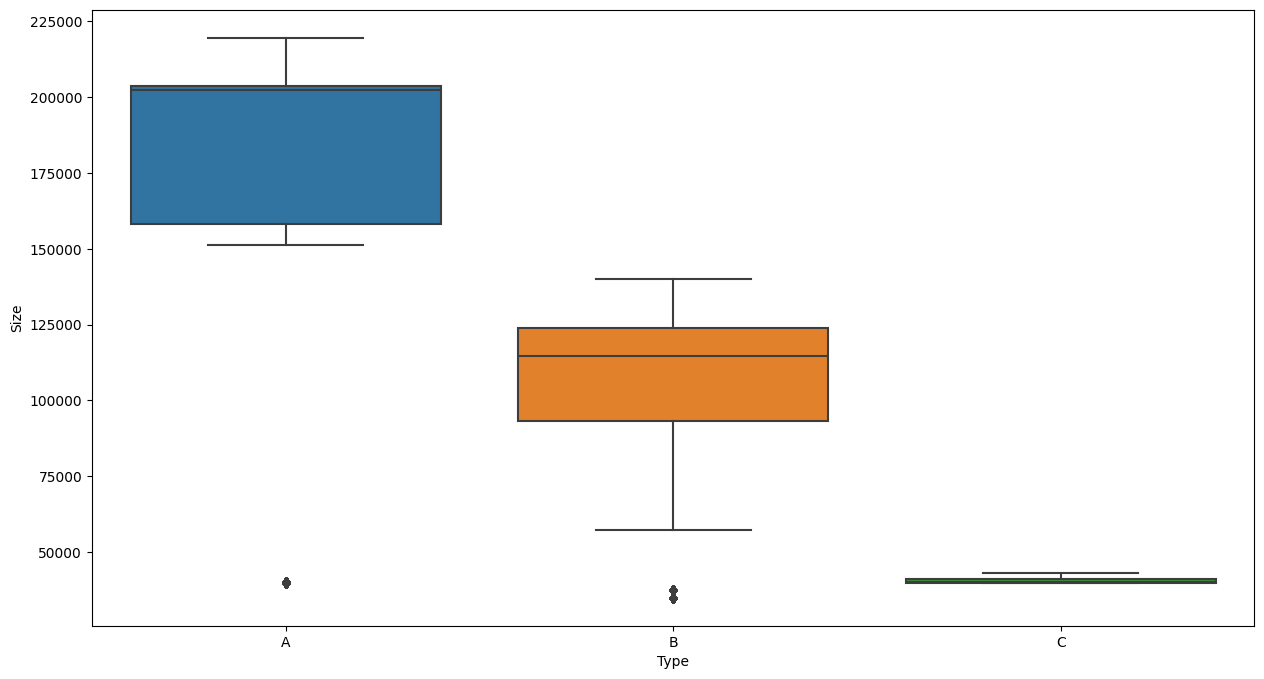

In [120]:
plt.figure(figsize=(15,8))
# plot the size of stores per type
sns.boxplot(data = data,y="Size",x="Type")

Inference 
+ Overall weekly sales of store A is high, followed by B and then C.
+ Type A & B store show spike during holidays whereas Type C is consistent over every month and doesnot show much deviation.
+ Store Count is in the order A, followed by B and then C
+ Size wise store A has most no of Items followed by B and then C
+ Store B had the highest weekly sale.  

### Department wise Analysis

In [124]:
print('Dept count :',len(data['Dept'].unique()))

Dept count : 81


In [126]:
# sales for all department per week 

sales_by_dept = data.groupby(by='Dept', as_index=False)['Weekly_Sales'].sum()
sales_by_dept.head()

,Dept,Weekly_Sales
0,1.0,1.236388e+08
1,2.0,2.806112e+08
2,3.0,7.589245e+07
3,4.0,1.671467e+08
4,5.0,1.356074e+08


Text(0.5, 0, 'Department')

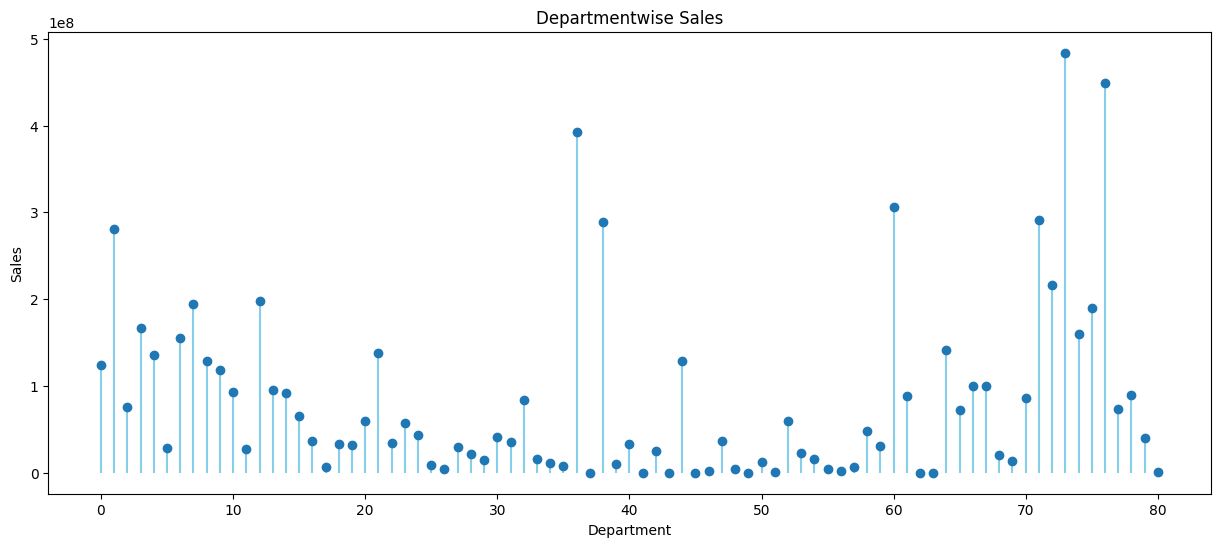

In [127]:
fig1, ax1 = plt.subplots(figsize=(15, 6))
plt.vlines(x=sales_by_dept.index, ymin=0, ymax=sales_by_dept['Weekly_Sales'], color='skyblue')
plt.plot(sales_by_dept.index,sales_by_dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

Inference : 
+ Departments 36, 73 and 76 show higher weekly sales.

### Ploting other fields against date

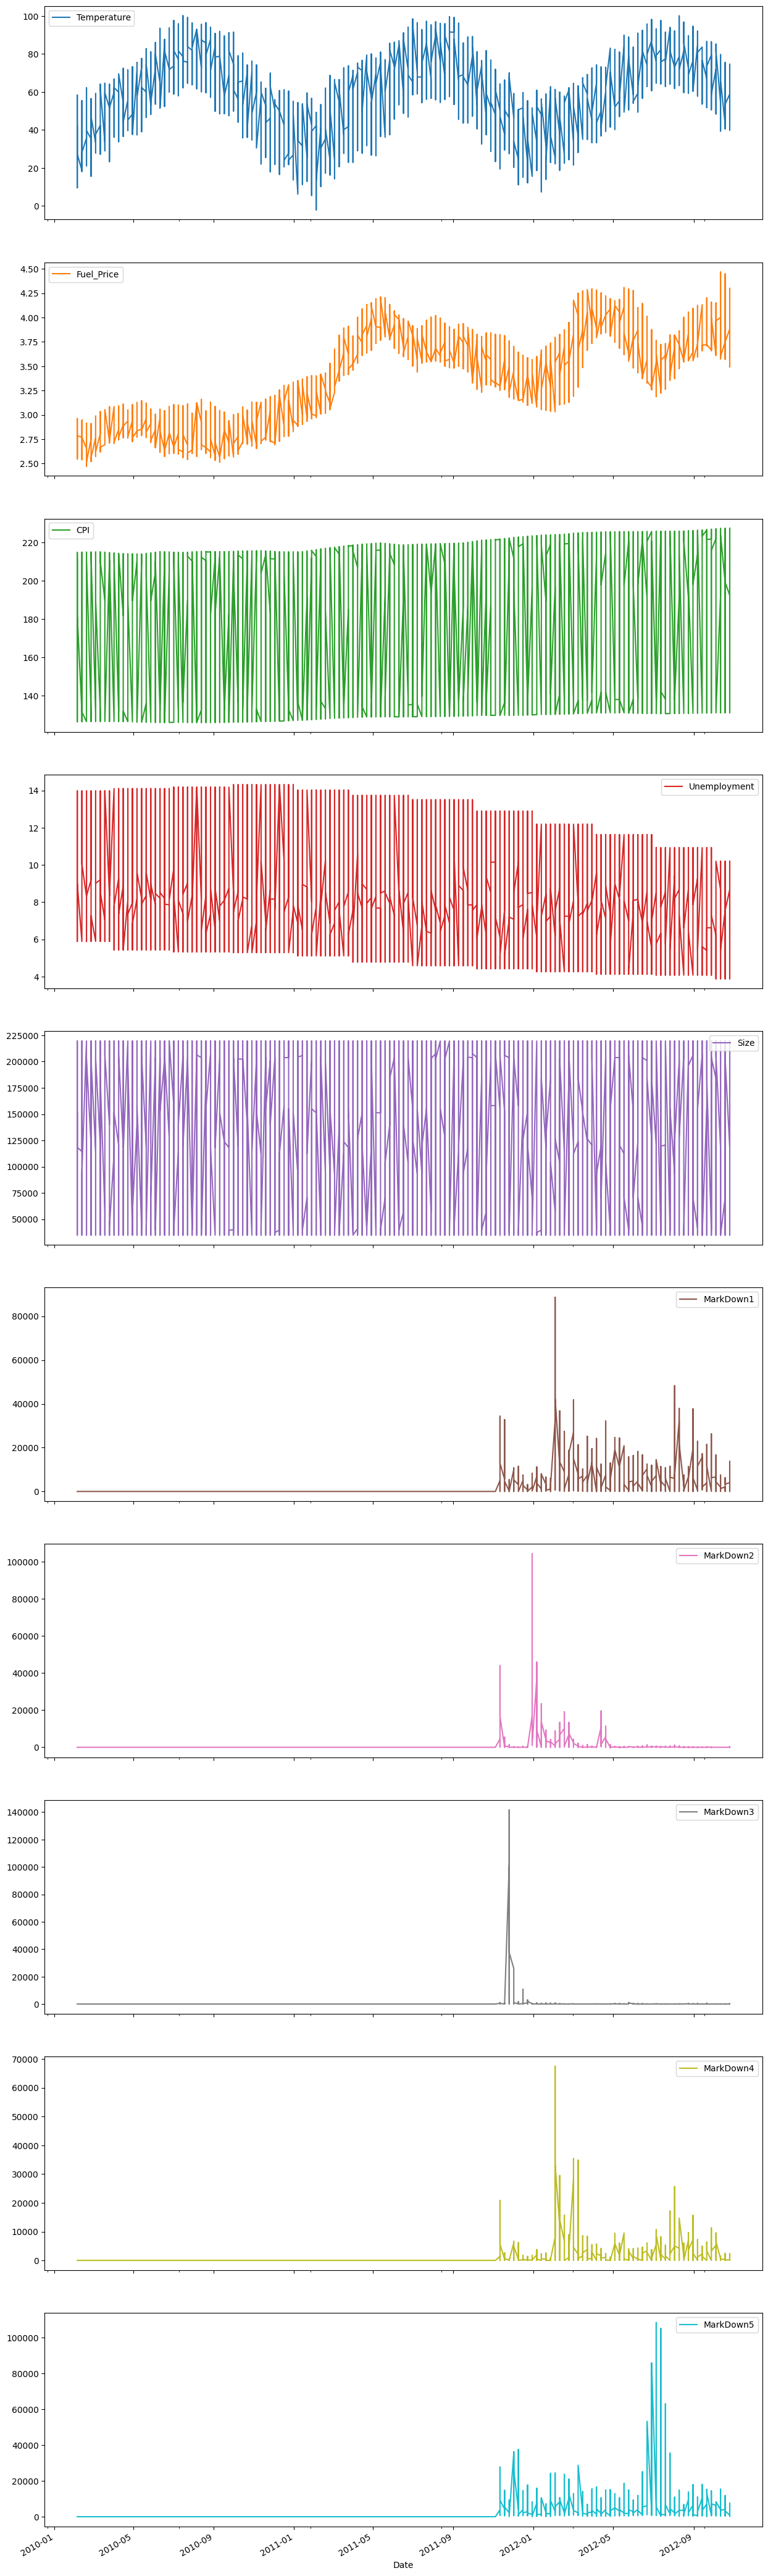

In [128]:
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size' ,
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(15,60))
plt.show()


### Inferences by features

#### Temperature

    + Data is normally distributed. The dataset contains sales data across seasons.
    + There are less number of outliers.
    + Few outliers are with 0-20 degrees
    + Depending on further analysis and while building model, decision to drop the outliers can be made

#### Fuel Price

    + Distribution is not normal. At the same time, outliers are limited too
    + The data points are skewed.
    + Upon further analysis, if the impact of Fuel prices on Sales is high, there could be interesting insights drawn and more analysis on how the fuel prices are influencing the sales will be useful.

At this point in time, not much can be commented about this


#### Markdown1 to MArkdown 5

Data for all markdown fields is has common things in common

    + Heavily skewed data with outliers
    + It might be safe to assume to drop the outliers as their number is less.
    + Proper hyp[othesis has to be done before dropping them

#### CPI

+ There is a clear cluster in CPI distribution. Data can be assumed as categorical.


#### unemployment

    + Distribution is not normal. At the same time, outliers are limited too
    + The data points are skewed.
    + Upon further analysis, if the impact of Fuel prices on Sales is high, there could be interesting insights drawn and more analysis on how the unemployment is influencing the sales will be useful.



c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

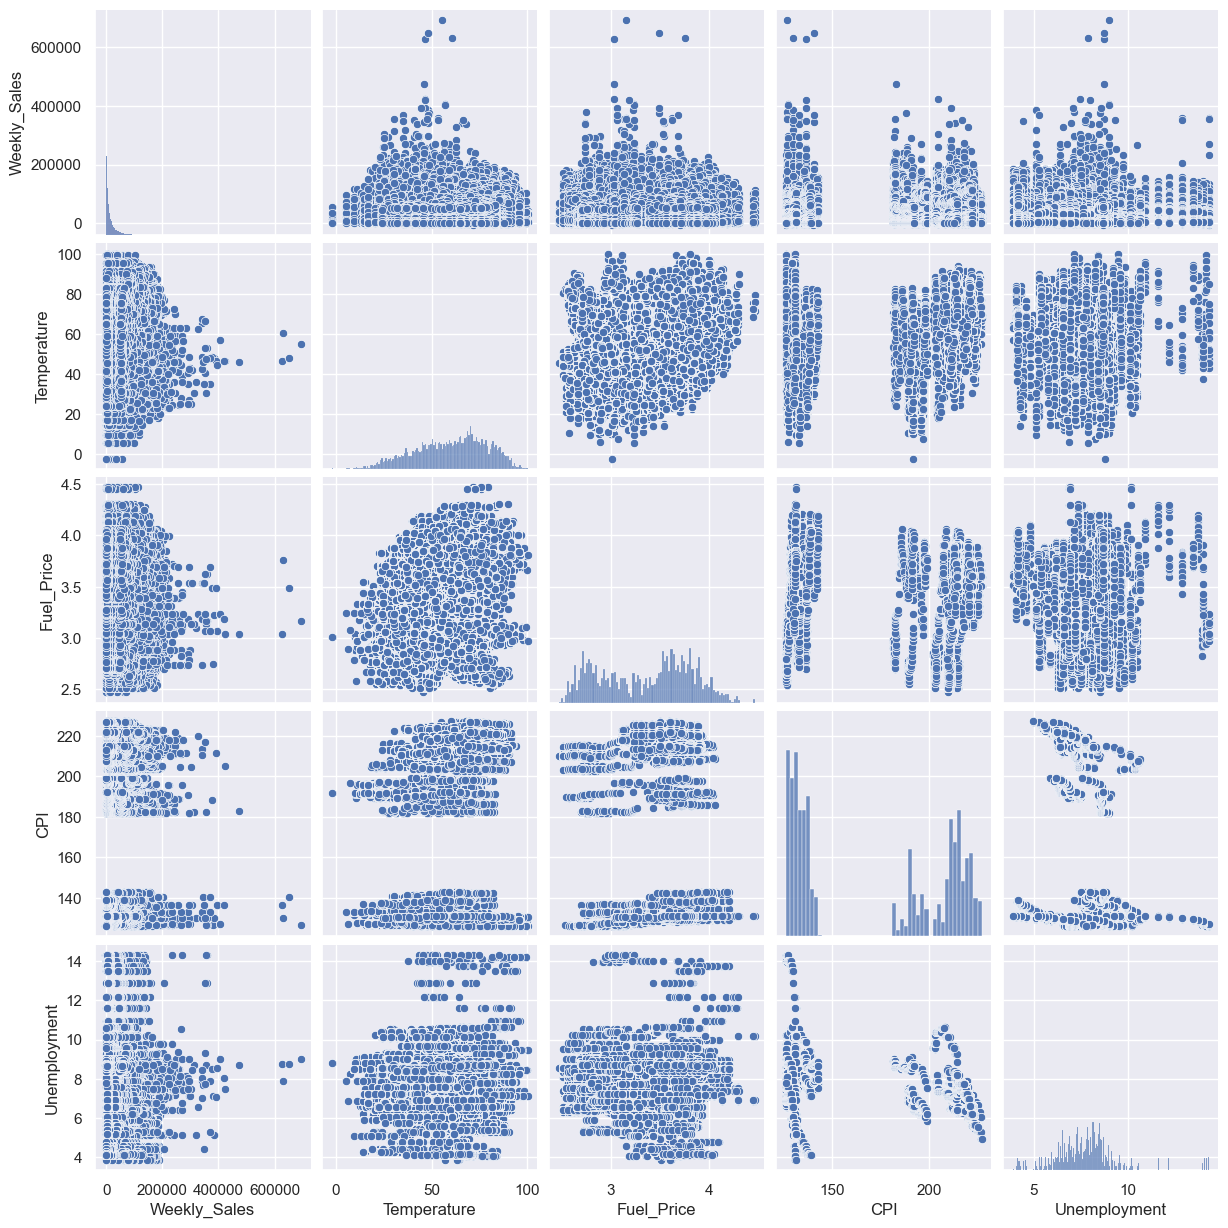

In [143]:
sns.set()
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.pairplot(data[cols], size = 2.5)
plt.show();


#### Notable Inferences

    + Weekly sales look to be highly skewed. The sales are very high during some days and relatively constant for the rest of the days
    + CPI has 2 clusters
    + Temperature is almost normally distributed across data. Indicates the data is collected over all kinds of whether conditions



Inference : 
+ Fuel Price and Consumer Price Index shown growth over the year.
+ Unemployment decreased year after year.

## Correlation Matrix & Heatmap

In [147]:
# Convert non-numeric columns to numeric values

data_type_drop = data.drop('Type', axis=1)


# Calculate correlation for the numeric DataFrame
df_corr = data_type_drop.corr()
df_corr

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,0.003362,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.004054,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,-0.002966
Date,0.003362,0.004054,1.000000,-0.000663,-0.013017,0.147064,0.771913,0.470865,0.127975,0.048749,0.297472,0.423599,0.077001,-0.243370,-0.005437
Weekly_Sales,-0.085195,0.148032,-0.000663,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,-0.013017,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,0.147064,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,0.771913,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.003361
MarkDown1,-0.059844,0.001494,0.470865,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,0.169788
MarkDown2,-0.033829,0.000587,0.127975,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.078372
MarkDown3,-0.020331,0.001475,0.048749,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.033641


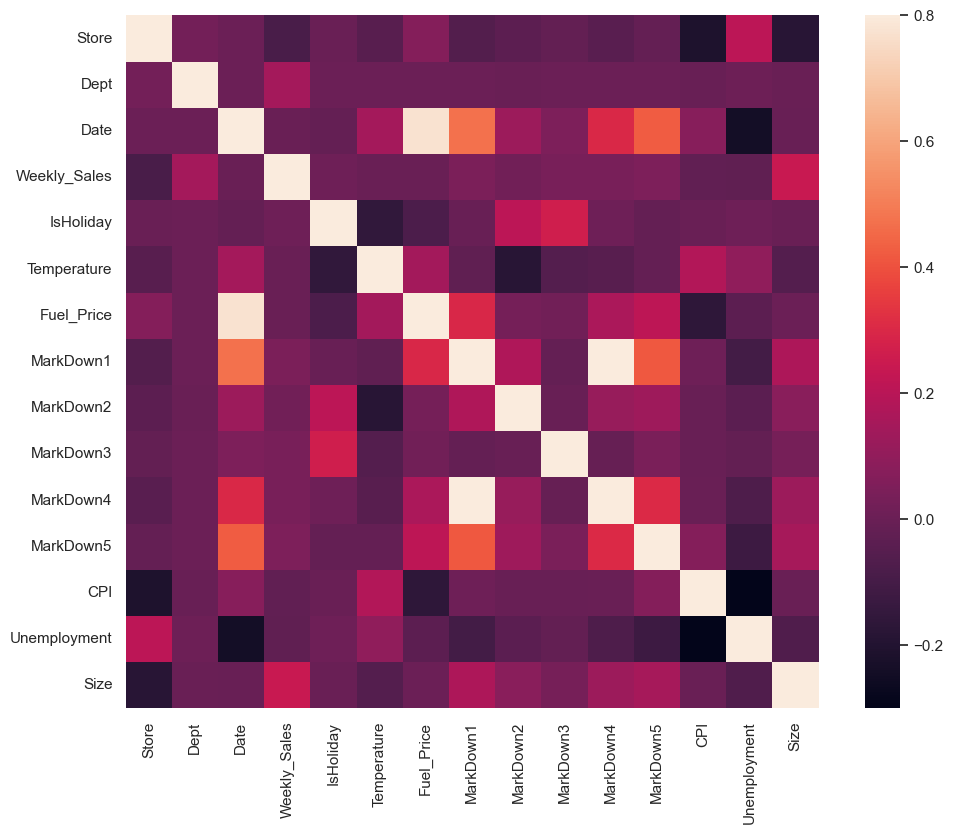

In [152]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_corr, vmax=.8, square=True)
plt.show()

c:\Users\Nivash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


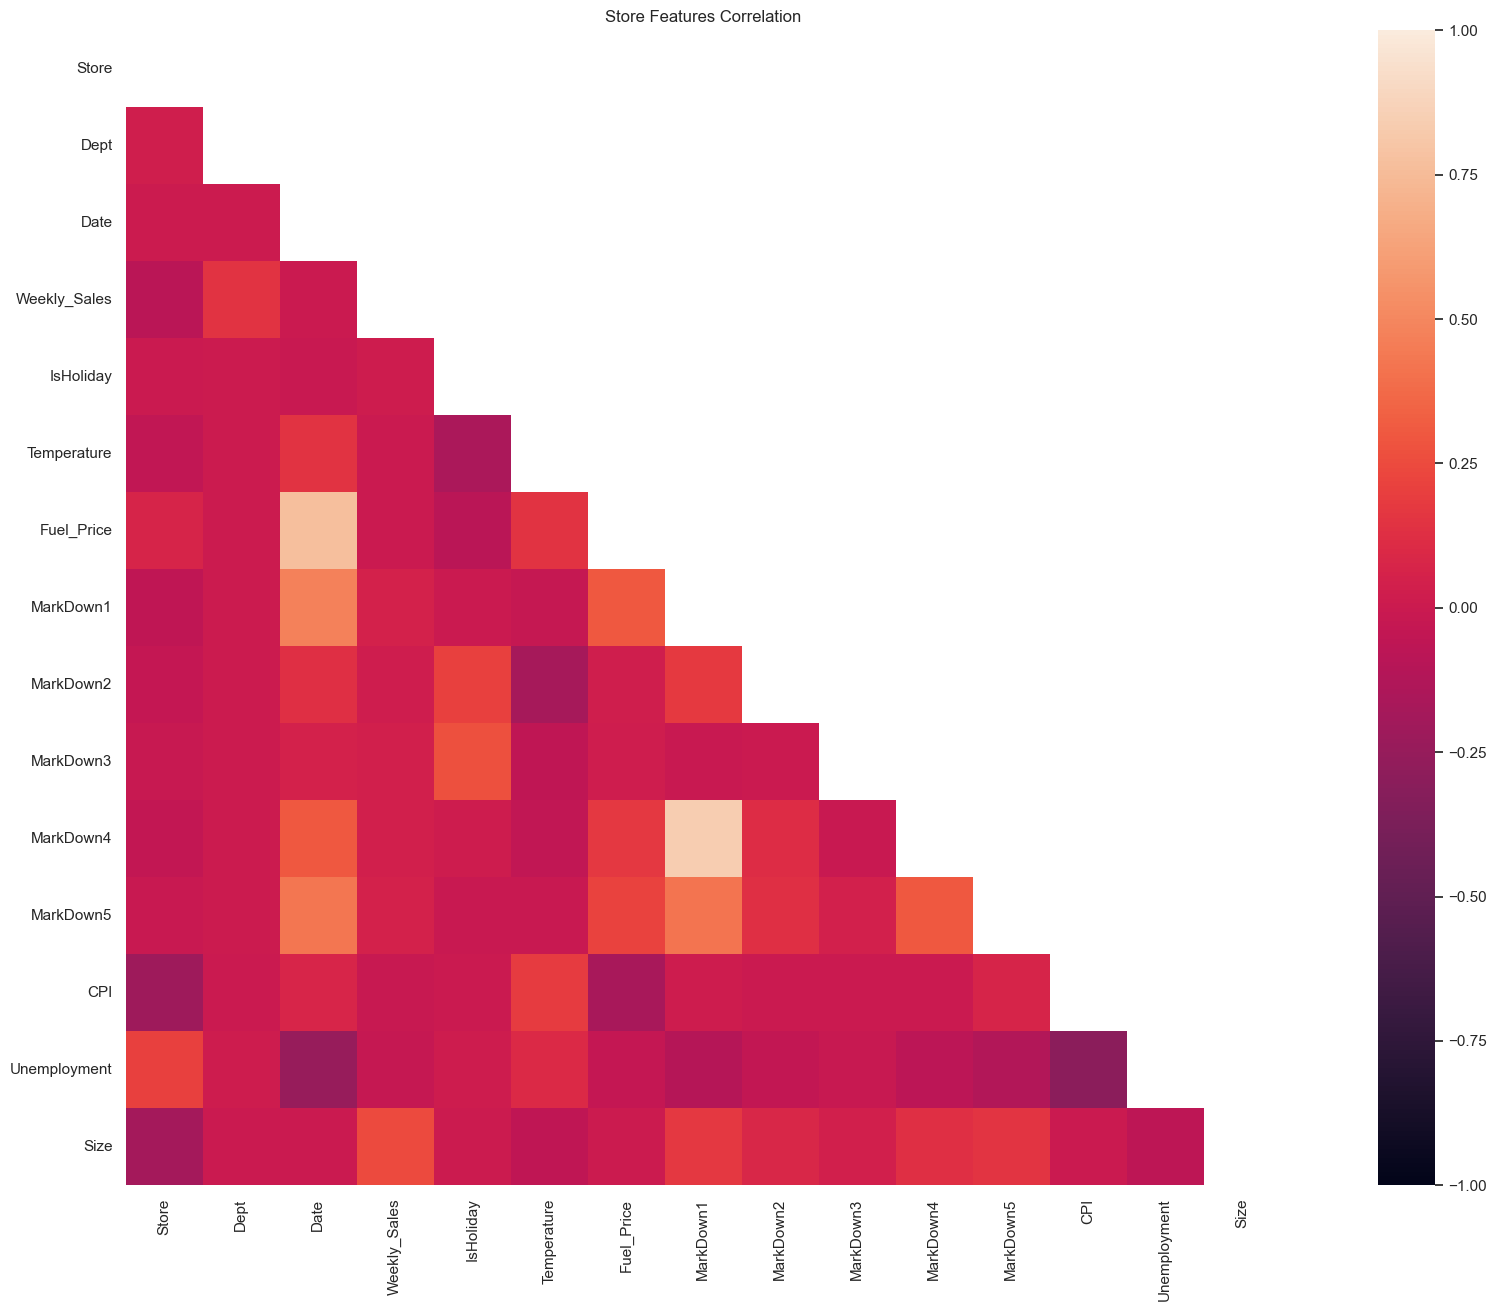

In [151]:
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    plt.title('Store Features Correlation')
    ax = sns.heatmap(df_corr, mask=mask, vmax=1, vmin=-1, square=True, annot=True, fmt=".3f", xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values)

plt.show()


#### Correlation Heatmap :

    There is a strong correlation between MArkdown 1 and Markdown 4 . One of the columns might be safe to be excluded when using regression models
    Holiday and Markdown 2 and Markdown 3 have moderate correlation
    Other columns looks to be fairly uncorrelated



Inference : 
+ Highly positive Correlation between MarkDown 1 and MarkDown 4
+ Weekly sales doesnot show any high correlation with any other parameters.
+ CPI and Unemployment/Store shows negative correlation.


## EDA Final words

Although not many patterns are found from varioud graphs above, one interesting trend observed is there are clear clusters of sales spikes during Nov-Dec for years 2010 and 2011. However, the pattern is missing for 2012 which is interesting.

Markdowns are introduced only towards end of year 2011 (Nov-11-2011) and there seem to be no direct correlation between Markdown and Sales. Markdowns also has many outliers.

One assumption to be made about Markdowns is to treat them as Promotions. But, there is no visible trend of Markdown vs Sales.

Either, the assumption of Markdown being is wrong or the Promotions are not attractive or there could be other reasons which derived the lower sales in 2012
